In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Load data
base_path = "/home/tvanhout/oxides_ML/models/hyperparameter_optimization/augment"
directory = "Set3/architecture_pool_heads/input_architecture_pool_heads_3"

# base_path = "/home/tvanhout/oxides_ML/models/hyperparameter_optimization/augment"
# directory = "testing_optimal_values/test2"

df_training     = pd.read_csv(os.path.join(base_path, directory , "training.csv"))
df_train_set    = pd.read_csv(os.path.join(base_path, directory , "train_set.csv")) 
df_test_set     = pd.read_csv(os.path.join(base_path, directory , "test_set.csv"))
df_val_set      = pd.read_csv(os.path.join(base_path, directory , "validation_set.csv"))
df_uq           = pd.read_csv(os.path.join(base_path, directory , "uq.csv"))

df_test_set[["Abs_error_eV"]].mean()

Abs_error_eV    0.449242
dtype: float64

## Performance metrics

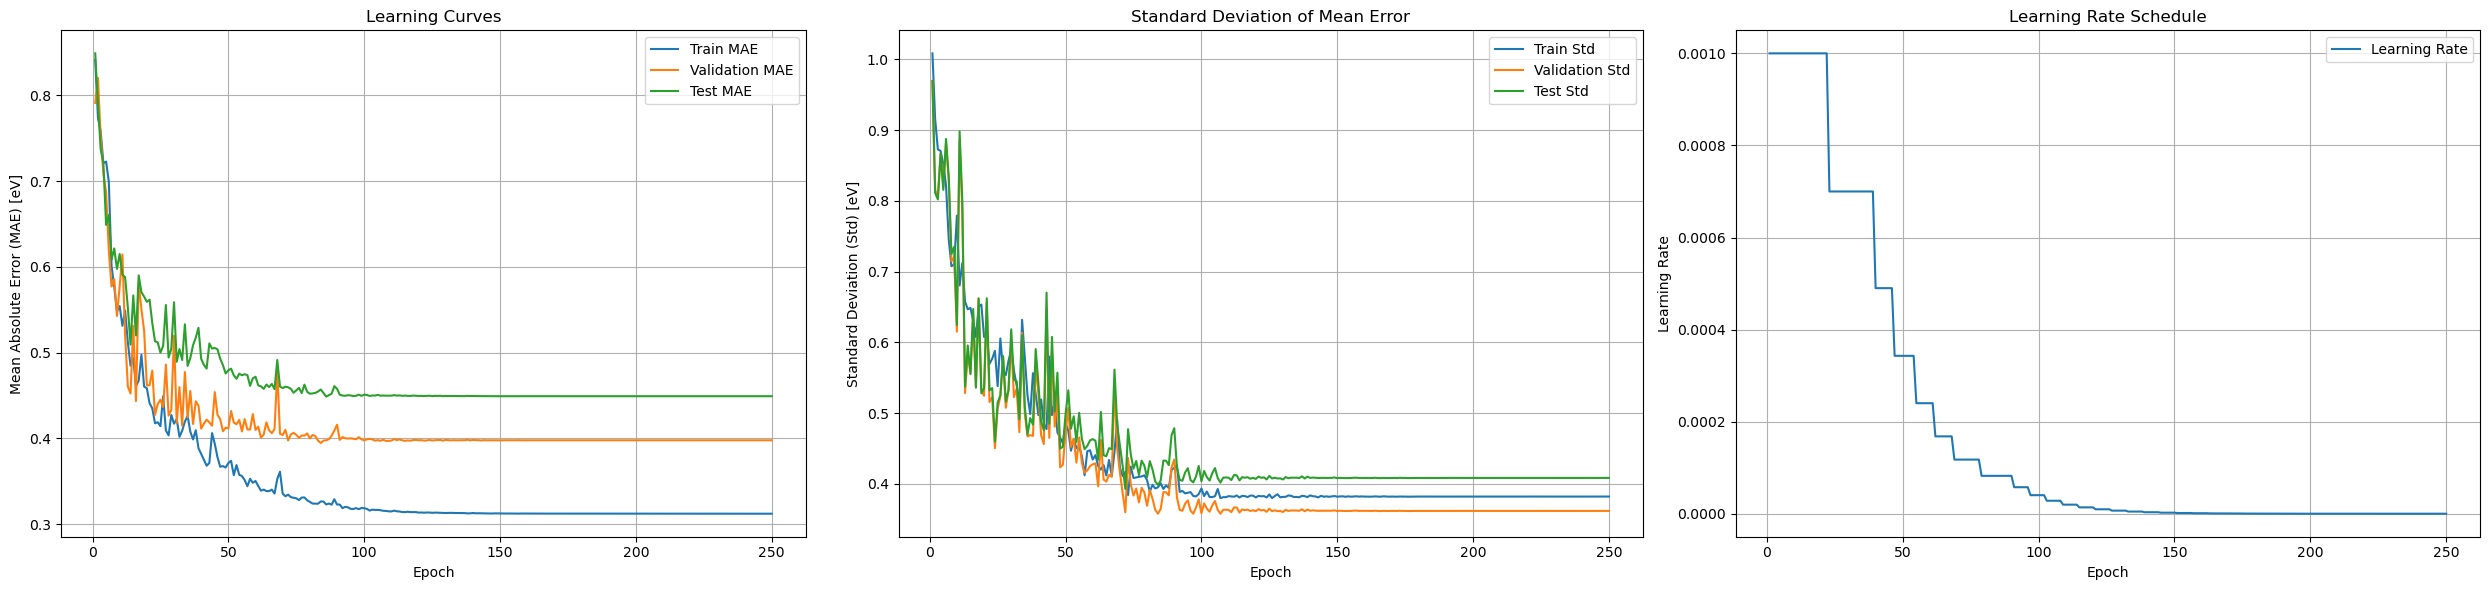

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Learning Curves (Train, Val, Test MAE)
axs[0].plot(df_training['Epoch'], df_training['Train_MAE_eV'], label='Train MAE')
axs[0].plot(df_training['Epoch'], df_training['Val_MAE_eV'], label='Validation MAE')
axs[0].plot(df_training['Epoch'], df_training['Test_MAE_eV'], label='Test MAE')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Absolute Error (MAE) [eV]')
axs[0].set_title('Learning Curves')
axs[0].legend()
axs[0].grid(True)

# Standard Deviation of Predictions (Train, Val, Test Std)
axs[1].plot(df_training['Epoch'], df_training['Train_std_eV'], label='Train Std')
axs[1].plot(df_training['Epoch'], df_training['Val_std_eV'], label='Validation Std')
axs[1].plot(df_training['Epoch'], df_training['Test_std_eV'], label='Test Std')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Standard Deviation (Std) [eV]')
axs[1].set_title('Standard Deviation of Mean Error')
axs[1].legend()
axs[1].grid(True)

# Learning Rate Schedule
axs[2].plot(df_training['Epoch'], df_training['Learning_Rate'], label='Learning Rate')

axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')
axs[2].set_title('Learning Rate Schedule')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##  Evaluation of the test set

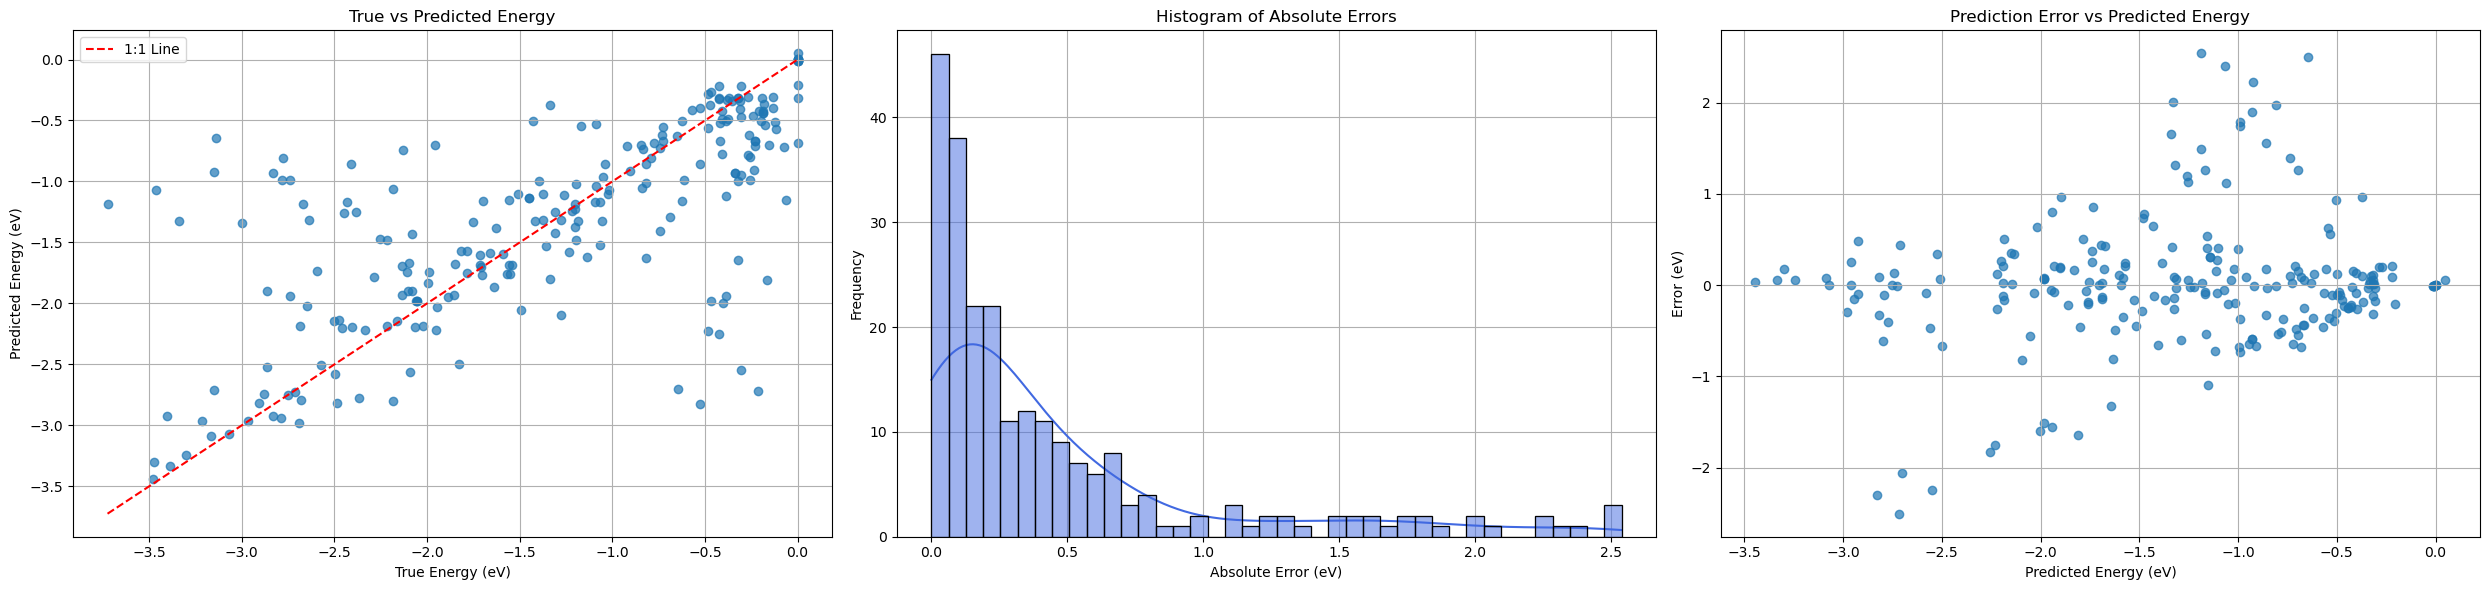

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  

# True vs. Predicted Energy Plot
axes[0].scatter(df_test_set['True_eV'], df_test_set['Prediction_eV'], alpha=0.7)
axes[0].plot([min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             [min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             'r--', label='1:1 Line')
axes[0].set_xlabel('True Energy (eV)')
axes[0].set_ylabel('Predicted Energy (eV)')
axes[0].set_title('True vs Predicted Energy')
axes[0].legend()
axes[0].grid(True)

# Histogram of Absolute Errors
sns.histplot(df_test_set['Abs_error_eV'], bins=40, kde=True, color='royalblue', ax=axes[1], zorder = 10)
axes[1].set_xlabel('Absolute Error (eV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Absolute Errors')
axes[1].grid(True)

# Prediction Error vs. Predicted Energy
axes[2].scatter(df_test_set['Prediction_eV'], df_test_set['Error_eV'], alpha=0.7)
axes[2].set_xlabel('Predicted Energy (eV)')
axes[2].set_ylabel('Error (eV)')
axes[2].set_title('Prediction Error vs Predicted Energy')
axes[2].grid(True)

plt.tight_layout()
plt.show()


## Uncertainty quantification

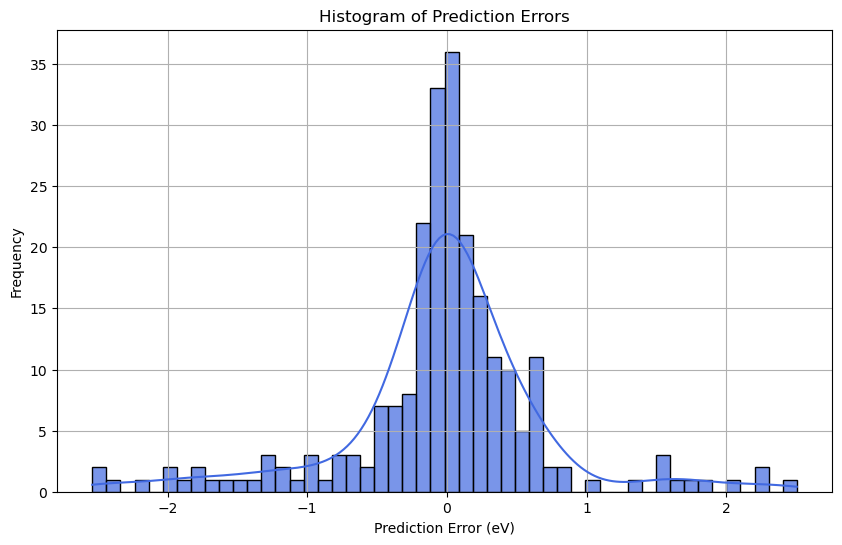

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df_uq['error'], bins=50, kde = True, color='royalblue', alpha=0.7)

plt.xlabel('Prediction Error (eV)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()


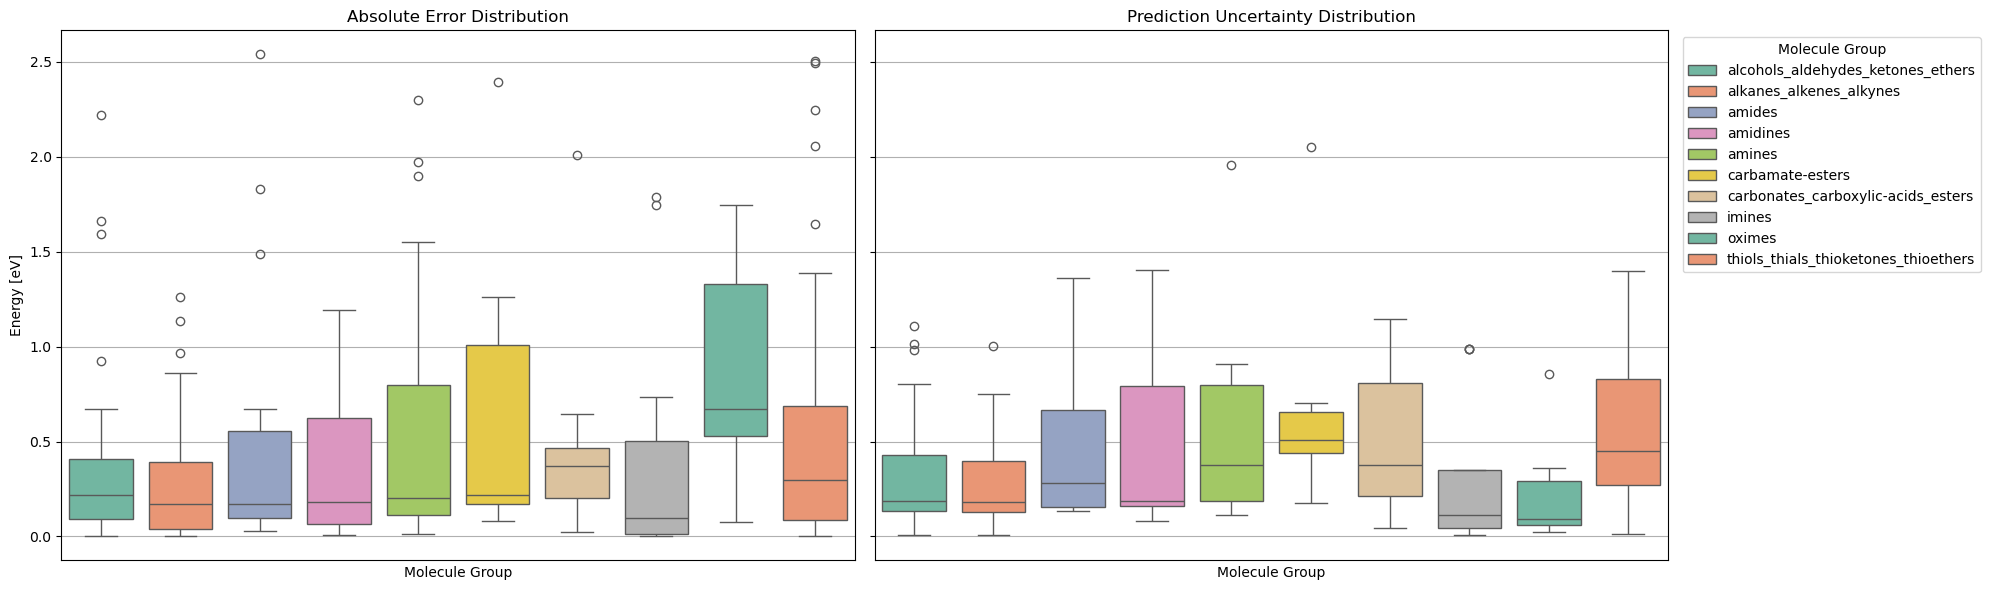

In [61]:
df_uq_sorted = df_uq.sort_values('molecule_group')

df_uq_sorted['abs_error'] = df_uq_sorted['error'].abs()
df_uq_sorted['uncertainty_width'] = df_uq_sorted['y_std']

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# First subplot: Absolute Error
sns.boxplot(data=df_uq_sorted, x='molecule_group', y='abs_error', hue='molecule_group', palette="Set2", legend=False, ax=axes[0])
axes[0].set_xlabel('Molecule Group')
axes[0].set_ylabel('Energy [eV]')
axes[0].set_title('Absolute Error Distribution')
axes[0].set_xticks([])
axes[0].grid(True)

# Second subplot: Uncertainty Width
sns.boxplot(data=df_uq_sorted, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True, ax=axes[1])
axes[1].set_xlabel('Molecule Group')
axes[1].set_ylabel('')  # Shared y-label already on left
axes[1].set_title('Prediction Uncertainty Distribution')
axes[1].set_xticks([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
df_uq.sort_values(["y_true"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.185952,-2.539138,1.359447,-3.850469,1.478564,True,-1.867773
109,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.477344,-3.443758,-0.033586,0.787881,-4.988006,-1.899511,True,-0.042628
158,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.471884,-3.301182,-0.170702,0.704588,-4.682176,-1.920189,True,-0.242271
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.066314,-2.396460,2.052328,-5.088877,2.956249,True,-1.167679
33,C2H4Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Acetic-acid,-3.402022,-2.924213,-0.477809,0.080990,-3.082954,-2.765472,False,-5.899578
168,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethiol,-3.389266,-3.333866,-0.055400,0.149420,-3.626728,-3.041003,True,-0.370768
9,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-1.326946,-2.010779,1.147314,-3.575682,0.921790,True,-1.752597
198,C2H5Ir40NO80,IrO2,110.0,imines,N-methylmethanimine,-3.301773,-3.244122,-0.057652,0.264436,-3.762416,-2.725827,True,-0.218017
21,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-3.215866,-2.961169,-0.254697,0.174984,-3.304137,-2.618200,True,-1.455547
118,CH3Ir40NO81,IrO2,110.0,oximes,Formaldoxime,-3.166023,-3.088637,-0.077387,0.090406,-3.265833,-2.911440,True,-0.855988


In [70]:
df_uq.sort_values(["y_std"], ascending=False).head(20)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.066314,-2.396460,2.052328,-5.088877,2.956249,True,-1.167679
80,C3H9Ir40NO80,IrO2,110.0,amines,Trimethylamine,-0.816608,-1.631881,0.815273,1.959224,-5.471961,2.208198,True,0.416120
162,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-0.060982,-1.150804,1.089822,1.404850,-3.904309,1.602701,True,0.775757
73,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-0.211618,-2.716976,2.505358,1.396600,-5.454313,0.020361,True,1.793898
63,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-2.671964,-1.185952,-1.486011,1.359447,-3.850469,1.478564,True,-1.093100
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.185952,-2.539138,1.359447,-3.850469,1.478564,True,-1.867773
178,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-2.448848,-1.257219,-1.191629,1.264892,-3.736407,1.221969,True,-0.942080
49,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Dimethylsulfane,-0.304123,-0.946853,0.642730,1.257992,-3.412516,1.518811,True,0.510917
89,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-0.645100,-2.700436,2.055336,1.232368,-5.115876,-0.284996,True,1.667795
161,C3H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-0.321018,-0.996632,0.675613,1.203141,-3.354787,1.361524,True,0.561541


In [74]:
df_uq.sort_values(["error"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
135,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-1.185952,-2.539138,1.359447,-3.850469,1.478564,True,-1.867773
197,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-3.142078,-0.647723,-2.494355,0.475376,-1.579459,0.284014,False,-5.247124
180,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.462773,-1.066314,-2.396460,2.052328,-5.088877,2.956249,True,-1.167679
224,C2H4Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Acetaldehyde,-3.148727,-0.926479,-2.222249,1.111010,-3.104058,1.251101,False,-2.000206
9,CH2Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Formic-acid,-3.337725,-1.326946,-2.010779,1.147314,-3.575682,0.921790,True,-1.752597
209,CH5Ir40NO80,IrO2,110.0,amines,Methanamine,-2.779948,-0.808706,-1.971242,0.716021,-2.212108,0.594696,False,-2.753049
107,C2H7Ir40NO80,IrO2,110.0,amines,Ethanamine,-2.831113,-0.929945,-1.901168,0.795603,-2.489327,0.629437,False,-2.389594
65,C3H7Ir40NO80,IrO2,110.0,imines,Propan-2-imine,-2.780688,-0.990911,-1.789778,0.986880,-2.925196,0.943375,True,-1.813571
132,C3H7Ir40NO80,IrO2,110.0,imines,Propan-2-imine,-2.737653,-0.990911,-1.746742,0.986880,-2.925196,0.943375,True,-1.769963
102,C2H6Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Ethanol,-3.001320,-1.341390,-1.659930,0.800700,-2.910762,0.227983,False,-2.073098


In [82]:
outliers = df_uq[df_uq["formula"] == "CH4Ir40O80S"]
outliers

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
113,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-2.486884,-2.819455,0.332571,0.684582,-4.161236,-1.477674,True,0.485801
133,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-3.070039,-3.071714,0.001675,0.181319,-3.427100,-2.716328,True,0.009239
197,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-3.142078,-0.647723,-2.494355,0.475376,-1.579459,0.284014,False,-5.247124


## Uncertainty Qualification per Surface

In [65]:
df_uq.groupby('material')['y_std'].mean()

material
IrO2    0.619427
RuO2    0.231094
Name: y_std, dtype: float64

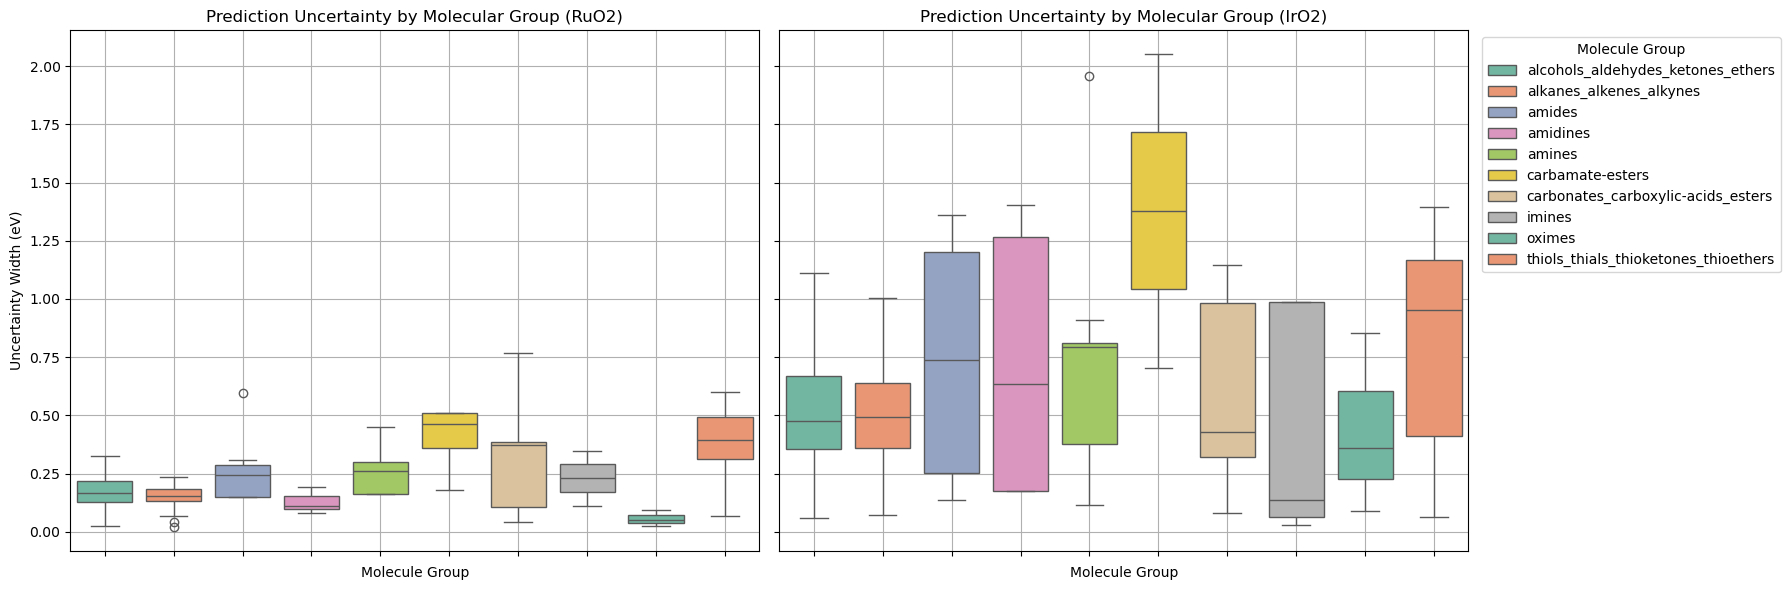

In [66]:
# Filter per material
df_ru = df_uq_sorted[df_uq_sorted['material'] == 'RuO2']
df_ir = df_uq_sorted[df_uq_sorted['material'] == 'IrO2']


# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  # 1 row, 2 columns

# RuO2 plot
sns.boxplot(data=df_ru, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=False, ax=axes[0]
)
axes[0].set_title("Prediction Uncertainty by Molecular Group (RuO2)")
axes[0].set_xlabel("Molecule Group")
axes[0].set_ylabel("Uncertainty Width (eV)")
axes[0].set_xticklabels([])
axes[0].grid(True)


# IrO2 plot
sns.boxplot(data=df_ir, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=True, ax=axes[1])
axes[1].set_title("Prediction Uncertainty by Molecular Group (IrO2)")
axes[1].set_xlabel("Molecule Group")
axes[1].set_ylabel("Uncertainty Width (eV)")
axes[1].set_xticklabels([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')



plt.tight_layout()
plt.show()


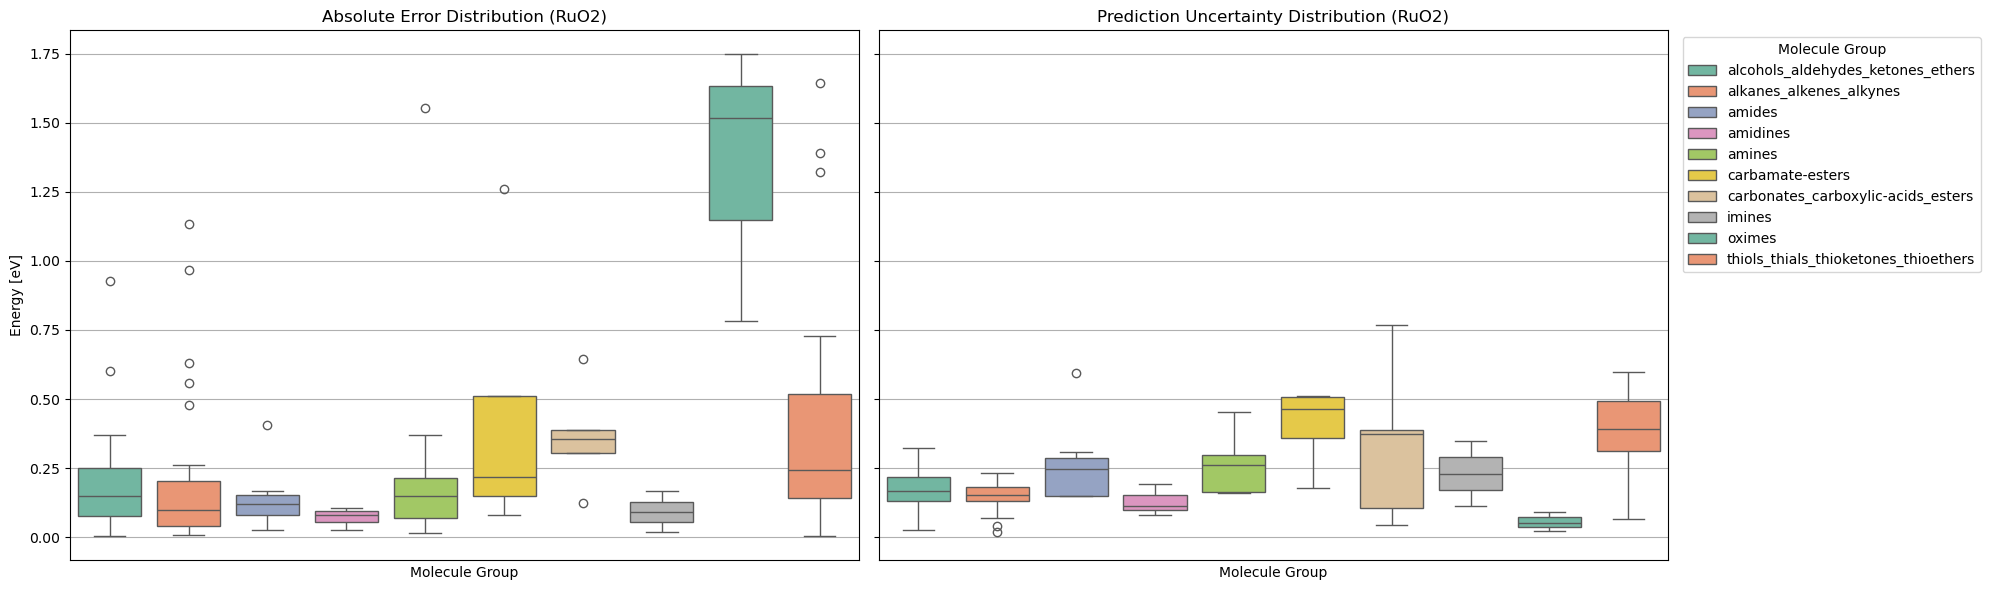

In [67]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# First subplot: Absolute Error
sns.boxplot(data=df_ru, x='molecule_group', y='abs_error', hue='molecule_group', palette="Set2", legend=False, ax=axes[0])
axes[0].set_xlabel('Molecule Group')
axes[0].set_ylabel('Energy [eV]')
axes[0].set_title('Absolute Error Distribution (RuO2)')
axes[0].set_xticks([])
axes[0].grid(True)

# Second subplot: Uncertainty Width
sns.boxplot(data=df_ru, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True, ax=axes[1])
axes[1].set_xlabel('Molecule Group')
axes[1].set_ylabel('')  # Shared y-label already on left
axes[1].set_title('Prediction Uncertainty Distribution (RuO2)')
axes[1].set_xticks([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

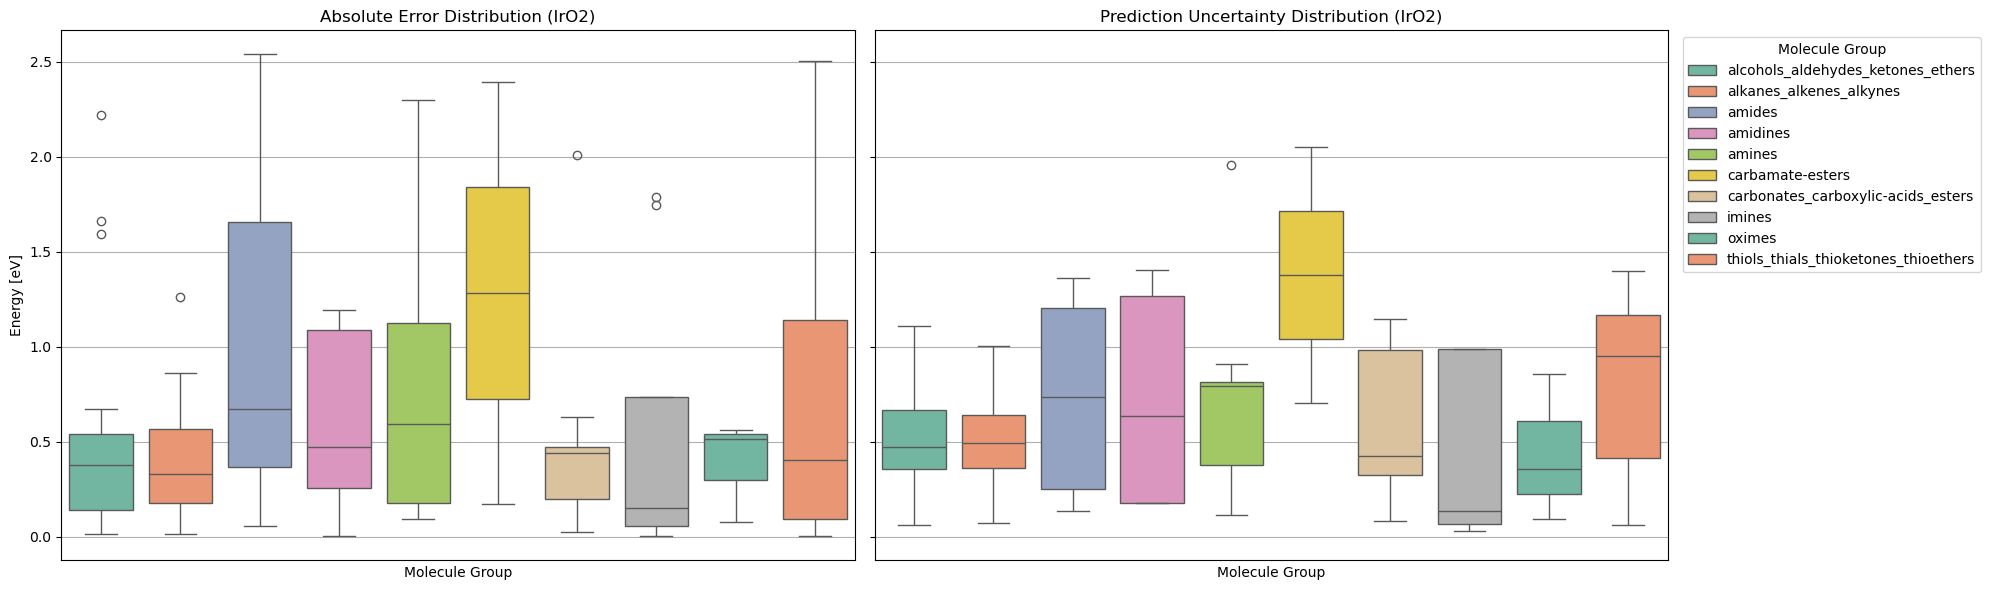

In [68]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# First subplot: Absolute Error
sns.boxplot(data=df_ir, x='molecule_group', y='abs_error', hue='molecule_group', palette="Set2", legend=False, ax=axes[0])
axes[0].set_xlabel('Molecule Group')
axes[0].set_ylabel('Energy [eV]')
axes[0].set_title('Absolute Error Distribution (IrO2)')
axes[0].set_xticks([])
axes[0].grid(True)

# Second subplot: Uncertainty Width
sns.boxplot(data=df_ir, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True, ax=axes[1])
axes[1].set_xlabel('Molecule Group')
axes[1].set_ylabel('')  # Shared y-label already on left
axes[1].set_title('Prediction Uncertainty Distribution (IrO2)')
axes[1].set_xticks([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()